# Bandit Problem

<img src="./image/02.png">

https://medium.com/udemy-engineering/building-a-multi-armed-bandit-system-from-the-ground-up-a-recommendations-and-ranking-case-study-b598f1f880e1 

## 필요모듈 import

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Setup Bandit Env
서로 다른 보상 기대값을 갖는 10개의 슬롯머신을 코드 형태로 구현  
agent의 선택에 따라 설정 된 기대값에 따라 보상이 주어지도록 구현, 보상체계는 0 혹은 1로 고정

In [8]:
class Bandit:
    # 클래스를 생성하면서 랜덤한 승률을 갖는 10개의 확률값 생성
    def __init__(self, arms=10): # 기대 추정치를 확인 할 개체 수 설정 기본설정으로 10개
        self.rates = np.random.rand(arms) # arms파라메터로 전달하는 갯수만큼 0과 1사이의 값을 리턴
    
    def play(self, arm):
        rate = self.rates[arm] # 전달하는 인스턴스 인덱스의 기대값 확인
        if rate > np.random.rand(): # 랜덤한 보상을 생성하기 위해 난수로 생성한 기대값과 새롭게 생성한 보상을 비교하고
            # 기대값의 차이에 따라 보상을 0, 1로 변경
            return 1
        else:
            return 0

In [4]:
# 10개의 랜덤 인스턴스 생성
bandit = Bandit()

In [11]:
# 각 슬롯머신의 기댓값 확인
bandit.rates

array([0.04897118, 0.4756015 , 0.06695853, 0.81007348, 0.72542142,
       0.67855495, 0.25296185, 0.99703254, 0.05736742, 0.9820231 ])

액션 횟수가 늘어남에 따라 추정되는 기대값의 평균 계산

# $$ Q(a) = {R_1 + R_2 + R_3 + R_4 ... R_n\over n}$$

In [6]:
# 대수의 법칙에 따라 샘플표본이 늘어 날 경우 기댓값의 평균이 기댓값으로 수렴
total_reward = 0
for i in range(3000):
    total_reward += bandit.play(0)
print(total_reward / (i - 1))

0.044029352901934625


수식으로만 살펴보면 전체 액션 보상에 대한 기대값의 평균을 사용해야 할 것 같지만 수식이 간단하게 정리가 가능 해집니다.

우선 n 회차가 아닌 n-1차 액션까지의 기댓값 보상의 평균 식은 아래와 같고
$$Q_{n-1} = {R_1 + R_2 + R_3 + R_4 ... R_{n-1} \over n-1}$$
분모를 정리하면
$${R_1 + R_2 + R_3 + R_4 ... R_{n-1}} = (n-1)Q_{n-1}$$
위 식을 Q(a)의 분자식에 대입을 합니다.
$$ Q(a) = {(n-1)Q_{n-1} + R_n\over n}$$
위 식을 그대로 사용해도 됩니다. 즉 현재 action의 기대값을 이전 횟수까지의 기대값에 이전 횟수를 곱한 수 현재 보상을 더한 값에 현재까지의 회수를 곱해 구할 수 있습니다.

In [10]:
Q = 0 # 기대값 추정치 초기화
for n in range(1, 11): # 10회 게임 셋팅
    reward = bandit.play(0) # 0번 인스턴스 보상 확인
    Q = ((n - 1) * Q + reward) / n # 초기에 0으로 설정한 기대값 업데이트 (증분)
    print(Q)

0.0
0.0
0.0
0.25
0.2
0.16666666666666666
0.14285714285714285
0.125
0.1111111111111111
0.1


In [12]:
# 위 기대값 업데이트 식을 매트릭스 리턴값을 갖는 함수로 제작
arms = 10
record = np.zeros((arms, 2)) # 액션횟수와 기대값을 저장하기 위한 변수 (10, 2) 1열 횟수, 2열 기대값
reward = bandit.play(0)

def update_record(record, arm, reward):
    new_r = (record[arm, 0] * record[arm, 1] + reward) / (record[arm, 0] + 1) # Q 함수 계산식
    record[arm, 0] += 1 # 횟수 추가
    record[arm, 1] = new_r # 기대값 업데이트
    return record[arm, :]

In [16]:
ex = 0
game = [3, 4, 6, 8, 9] + [10]
sum(game) / 5
((5 * 6) + 10) / 6

6.666666666666667

책에서 소개한 방법까지 식을 정리합니다.
$$ Q(a) = {1 \over n}\left\{(n-1)Q_{n-1} + R_n \right\}$$
$$ Q(a) = \left(1  - {1 \over n}\right)Q_{n-1} + {1 \over n}R_n$$
$$ Q(a) = Q_{n-1} + {1 \over n}(R_n - Q_{n-1})$$

## Update expectation
각 게임 횟수에 따른 Q 계산을 위해 증분 과정을 추가하여 보상을 확인하는 코드

In [20]:
Q = 0 # 기대값 추정치 초기화
for n in range(1, 11): # 10회 게임 셋팅
    reward = bandit.play(0) # 0번 인스턴스 보상 확인
    Q += (reward - Q) / n # 초기에 0으로 설정한 기대값 업데이트 (증분)
    print([n, Q])

[1, 0.0]
[2, 0.0]
[3, 0.0]
[4, 0.0]
[5, 0.0]
[6, 0.16666666666666666]
[7, 0.14285714285714285]
[8, 0.125]
[9, 0.1111111111111111]
[10, 0.09999999999999999]


In [22]:
# 10개 인스턴트에 대한 모든 기대값 출력
Qs = np.zeros(10) # 기댁값 저장 변수
Ns = np.zeros(10) # 횟수저장 변수

for i in range(10):
    action = np.random.randint(0, 10) # 인스턴스 선택
    reward = bandit.play(action) # 해당 인스턴스 보상 확인
    
    Ns[action] += 1 # 횟수 추가
    Qs[action] += (reward - Qs[action]) / Ns[action] # 증분 기대값 업데이트
    print(Ns, Qs)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 1. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 2. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 1. 1. 0. 0. 2. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 2. 1. 0. 0. 2. 0. 0. 0. 0.] [0.  0.5 0.  0.  0.  1.  0.  0.  0.  0. ]
[0. 2. 1. 0. 1. 2. 0. 0. 0. 0.] [0.  0.5 0.  0.  1.  1.  0.  0.  0.  0. ]
[0. 2. 1. 0. 1. 2. 1. 0. 0. 0.] [0.  0.5 0.  0.  1.  1.  0.  0.  0.  0. ]
[0. 2. 1. 0. 1. 2. 1. 0. 1. 0.] [0.  0.5 0.  0.  1.  1.  0.  0.  0.  0. ]
[0. 2. 1. 0. 1. 2. 2. 0. 1. 0.] [0.  0.5 0.  0.  1.  1.  0.  0.  0.  0. ]
[0. 2. 2. 0. 1. 2. 2. 0. 1. 0.] [0.  0.5 0.  0.  1.  1.  0.  0.  0.  0. ]


## setup Agent
agent는 기대치가 가장 높은 슬롯머신을 찾는 것을 목적으로 한다.  
현재까지의 기대값에 따라 선택을 하는 explotitation(활용, greedy algorithm), exploration(탐색)을 통해 action을 선택한다.  
특정 확률값(엡실론)에 따라 탐색(다른 슬롯머신을 시도)하는 액션을 코드로 구현한다.

In [23]:
class Agent:
    def __init__(self, epsilion, action_size=10):
        self.epsilion = epsilion # 무작위로 탐색 시도할 확률 0~1사이 실수
        self.Qs = np.zeros(action_size)
        self.Ns = np.zeros(action_size)
        
    def update(self, action, reward): # 기대값 업데이트
        self.Ns[action] += 1
        self.Qs[action] += (reward - self.Qs[action]) / self.Ns[action]
        
    def get_action(self):
        if np.random.rand() < self.epsilion: # 랜덤하게 생성되는 확률값이 초기에 설정된 epsilon 확률 보다 낮으면 (랜덤성부여)
            return np.random.randint(0, len(self.Qs)) # 랜덤한 액션 정수값 리턴
        return np.argmax(self.Qs) # 기대값이 가장 높은 인스턴스 인덱스 리턴

## action!
1000번의 action을 통해 확인되는 기댓값이 가장 높은 인스턴스 선택

894


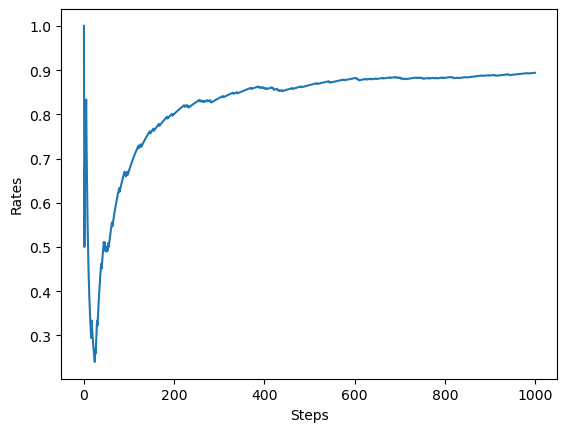

In [28]:
steps = 1000
epsilon = 0.1 # greedy 반대 확률 설정 랜덤하게 다른 시도를 하는 확률

bandit = Bandit()
agent = Agent(epsilon)
total_reward = 0
total_rewards = []
rates = []

for step in range(steps):
    action = agent.get_action() # 플레이어가 취할 action 선택
    reward = bandit.play(action) # action에 따라 주어지는 env 보상
    agent.update(action, reward) # 보상에 따라 학습
    total_reward += reward

    total_rewards.append(total_reward)
    rates.append(total_reward / (step + 1))

print(total_reward)

plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(rates)
plt.show()

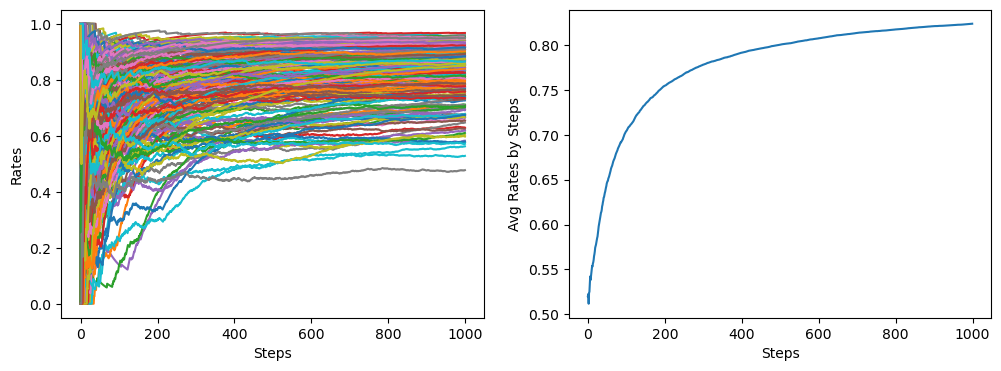

In [29]:
# 100번 시도
runs = 200
steps = 1000
epsilon = 0.1 # greedy 반대 확률 설정
total_rates = np.zeros((runs, steps))

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].set_ylabel('Rates')
axs[0].set_xlabel('Steps')
axs[1].set_ylabel('Avg Rates by Steps')
axs[1].set_xlabel('Steps')


for run in range(runs):
    bandit = Bandit()
    agent = Agent(epsilon)
    total_reward = 0
    rates = []
    for step in range(steps): 
        action = agent.get_action() # 플레이어가 취할 action 선택
        reward = bandit.play(action) # action에 따라 주어지는 env 보상
        agent.update(action, reward) # 보상에 따라 학습
        total_reward += reward
        rates.append(total_reward / (step + 1))
    total_rates[run] = rates
    axs[0].plot(rates)
avg_step_rates = np.average(total_rates, axis=0) # 49p 그림 1-15 참조
axs[1].plot(avg_step_rates)
plt.show()

## 활용(exploitation), 탐색(exploration)
agent는 랜덤한 확률로 기대값이 가장 높은 선택을 하는 것이 아닌 다른 선택을 할 수 있도록 랜덤성을 부여 할 수 있다.  
이를 탐색이라하며 epsilon으로 명명한다. 곧 epsilon은 탐색을 위한 확률값이라고 생각 할 수 있다.  
이 epsilon값에 따라 밴디트 문제의 승률이 달라지기에 최적의 epsilon을 선택하기 위한 과정을 추가해본다.

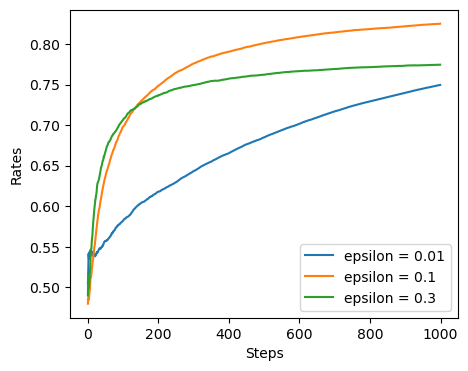

In [30]:
runs = 200
steps = 1000
epsilon = [0.01, 0.1, 0.3] # greedy 반대 확률 설정
total_rates = np.zeros((runs, steps))

fig, ax = plt.subplots(1, 1, figsize=(5, 4))

ax.set_ylabel('Rates')
ax.set_xlabel('Steps')
# axs[1].set_ylabel('Avg Rates by Steps')
# axs[1].set_xlabel('Steps')

for eps in epsilon:
    for run in range(runs):
        bandit = Bandit()
        agent = Agent(eps)
        total_reward = 0
        rates = []
        for step in range(steps): 
            action = agent.get_action() # 플레이어가 취할 action 선택
            reward = bandit.play(action) # action에 따라 주어지는 env 보상
            agent.update(action, reward) # 보상에 따라 학습
            total_reward += reward
            rates.append(total_reward / (step + 1))
        total_rates[run] = rates
    avg_step_rates = np.average(total_rates, axis=0) # 49p 그림 1-15 참조
    ax.plot(avg_step_rates, label=f'epsilon = {eps}')
plt.legend()
plt.show()

## Nonstasionary Bandit Ploblem
위에서 구현한 bandit문제는 env가 정해지면 각 슬롯머신의 승률은 고정되어 변경이 되지 않는 staionary(정상시계열) 문제이다.  
승률이 액션을 취함에 따라 변경이 되는 문제도 정의할 수 있으며 이는 Nonstationary(비정상시계열)문제이다.  

정상시계열 문제의 기대값을 계산하기 위한 수식을 확인 해보면
$$ Q(a) = Q_{n-1} + {1 \over n}(R_n - Q_{n-1})$$
이전 횟수에 더해져서 들어가는 ${1 \over n}$ 값이 업데이트 되는 보상에 곱해져서 추가되는 가중치로 생각 할 수 있습니다.  
${1 \over n}$ 값을 0과 1사이의 실수값인 $\alpha$ 라는 값으로 치환하여 생각해보면
$$ Q_n = Q_{n-1} + \alpha(R_n - Q_{n-1})$$
$$ Q_n = \alpha R_n + (1 - \alpha)Q_{n-1}$$
위 식에서 이전 횟수에 대한 식으로 변경 해보면
$$ Q_{n-1} = \alpha R_{n-1} + (1 - \alpha)Q_{n-2}$$
위에서 정의한 $Q_n$ 식의 $Q_{n-1}$ 항을 위 식에 대입하면
$$ Q_n = \alpha R_n + (1 - \alpha)\left\{\alpha R_{n-1} + (1 - \alpha)Q_{n-2}\right\}$$
$$ Q_n = \alpha R_n + \alpha(1-\alpha)R_{n-1} + (1-\alpha)^2 Q_{n-2}$$
위 전개식을 n번 반복한다면 아래 식이 만들어집니다.
$$ Q_n = \alpha R_n + \alpha(1-\alpha)R_{n-1} ... + \alpha(1-\alpha)^{n-1} R_1 + (1-\alpha)^n Q_0$$
곧 각 회차에 해당하는 R에 해당하는 값의 가중치가 지수적으로 감소하는 것을 확인 가능합니다.  
시계열 문제에서 주로 사용하는 지수이동평균(MA)과 비슷한 형태의 기대값을 계산함을 알 수 있습니다.

Nonstationary 문제를 정의하기 위한 환경을 구현해보면 아래와 같다.

In [31]:
class NonStatBandit:
    def __init__(self, arms=10):
        self.arms = arms
        self.rates = np.random.rand(arms)

    def play(self, arm):
        rate = self.rates[arm]
        self.rates += 0.1 * np.random.randn(self.arms)  # 노이즈 추가
        if rate > np.random.rand():
            return 1
        else:
            return 0

In [32]:
class AlphaAgent:
    def __init__(self, epsilon, alpha, actions=10):
        self.epsilon = epsilon
        self.Qs = np.zeros(actions)
        self.alpha = alpha  # 고정값 α

    def update(self, action, reward):
        # α로 갱신
        self.Qs[action] += (reward - self.Qs[action]) * self.alpha

    def get_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, len(self.Qs))
        return np.argmax(self.Qs)

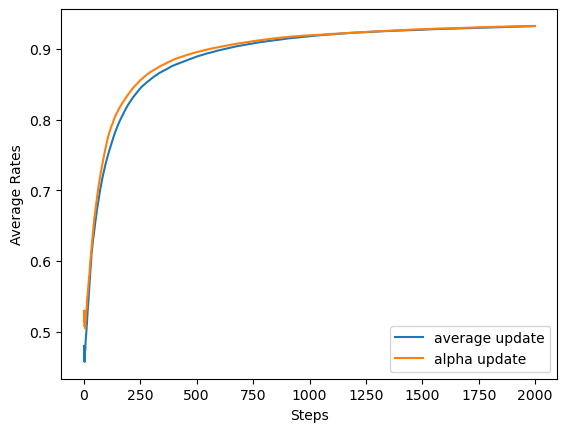

In [35]:
runs = 200
steps = 2000
epsilon = 0.1
alpha = 0.8
agent_types = ['average update', 'alpha update']
results = {}

for agent_type in agent_types:
    all_rates = np.zeros((runs, steps))  # (200, 1000)

    for run in range(runs):
        if agent_type == 'sample average':
            agent = Agent(epsilon)
        else:
            agent = AlphaAgent(epsilon, alpha)

        bandit = NonStatBandit()
        total_reward = 0
        rates = []

        for step in range(steps):
            action = agent.get_action()
            reward = bandit.play(action)
            agent.update(action, reward)
            total_reward += reward
            rates.append(total_reward / (step + 1))

        all_rates[run] = rates

    avg_rates = np.average(all_rates, axis=0)
    results[agent_type] = avg_rates

# [그림 1-20] 표본 평균과 고정값 α에 의한 갱신 비교
plt.figure()
plt.ylabel('Average Rates')
plt.xlabel('Steps')
for key, avg_rates in results.items():
    plt.plot(avg_rates, label=key)
plt.legend()
plt.show()